# Analysis of Twitter Data

## Generating Word Cloud From Twitter Feed 
First, we need to install these additional modules:
 * wordcloud
 * scipy
 
Note that you can run "*easy_insatll wordcloud*", and this link [https://www.microsoft.com/en-us/download/confirmation.aspx?id=44266] should be useful.

Next, we will need to read all tweets into a DataFrame.

In [2]:
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

tweets_data_path = 'D:\\MASTER_DEGREE\\twitter_data\\code\\twitter_data.json'
#tweets_data_path = 'C:\\Users\\knotsupavit\\Desktop\\jupyter\\tweets.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
count = 0
for line in tweets_file:
    try:
        count = count + 1
        tweet = json.loads(line)
        tweets_data.append(tweet)
        if count%100 == 0:
            sys.stdout.write('.')
        if count%7000 == 0:
            sys.stdout.write('\n')
    except Exception as e:
        print e
        continue
print "\n%s tweets read." % (count)
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet.get('text', None), tweets_data)
tweets

Expecting object: line 1 column 2 (char 1)
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decoded
No JSON object could be decod

,text
0,"#javascript How we deploy at npm, Inc.: https:..."
1,"A prophecy, an ancient evil, as 3 worlds link...."
2,Quick Tip: Replace jQuery’s Ready() with Plain...
3,*quickly* Ruby!
4,JavaScript Programming https://t.co/fd7sEd0uOH...
5,RT @wmag: Dorothy Gales's ruby slippers are de...
6,RT @nixcraft: Q. Why did the python programmer...
7,RUBY ON RAILS DEVELOPER: GEMMA HAYES RECRUITME...
8,#NBA 2015-16 Panini FLAWLESS RUBY Pau Gasol AU...
9,The latest Netsi day-to-day news! https://t.co...


Create the word cloud as follows:

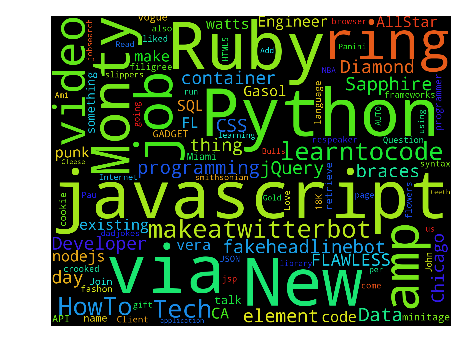

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# join tweets to a single string
words = ' '.join(tweets['text'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      max_words=100,
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()

Change the rear mask..

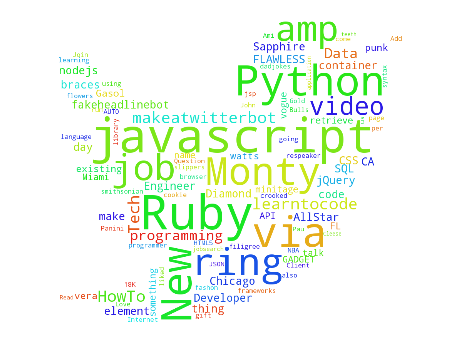

In [11]:
from scipy.misc import imread

logomask = imread('twitter_mask.png')

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=100,
                      mask = logomask,
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_2.png', dpi=300)
plt.show()